In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from json import load

In [4]:
results = load(open('bandbyband_dlam_results.json', 'r'))
# results = load(open('bandbyband_dlam_results_slope_with_color_prior.json', 'r'))
# results = load(open('bandbyband_dlam_results_slope_nocolor.json', 'r'))

In [39]:
from astropy.table import Table

classifications = load(open('classifications.json', 'r'))

classifications = Table(rows=list(classifications.items()), names=['Target', 'Type'])

In [5]:
a = set()
n_results = len(results) + 3
for i in range(2, n_results):
    if n_results > i and n_results % i == 0: 
        a.add(i)
a

{2, 3, 4, 6, 9, 12, 18}

In [6]:
len(results)

33

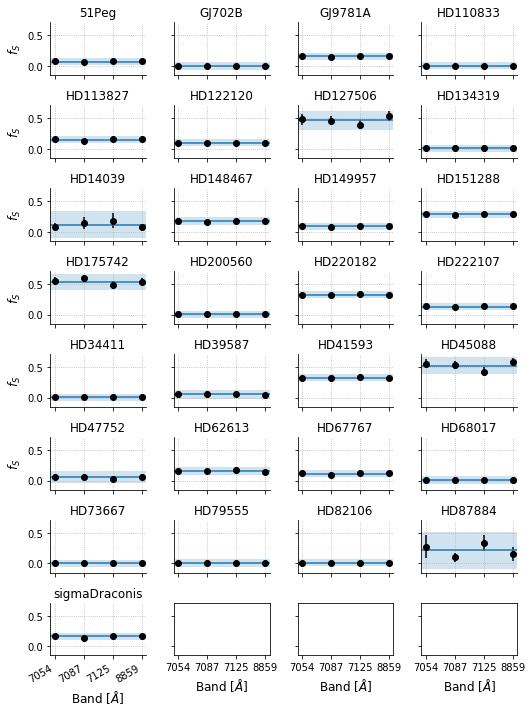

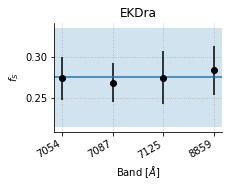

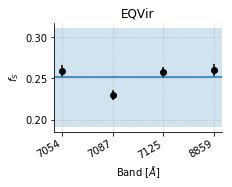

In [7]:
fig, ax = plt.subplots(8, 4, figsize=(7.5, 10), sharex=True, sharey=True)

table_results = []

f_S_all = []
f_S_err_all = []
f_S_stars = [] 

stars_big_plot = sorted(results.keys())
# stars_big_plot.remove('EKDra')
# stars_big_plot.remove('EQVir')

filtered_stars_big_plot = []
for s in stars_big_plot:
    if not s.startswith("E"):
        filtered_stars_big_plot.append(s)

for star in ['EKDra', 'EQVir']:
    figure, axis = plt.subplots(figsize=(3, 2))
    for time in results[star]:
        f_S = np.mean([results[star][time][band]['f_S'] for band in results[star][time]])
        f_S_err = np.sqrt(np.sum(np.array([np.mean([results[star][time][band]['f_S_lower'], 
                                                    results[star][time][band]['f_S_upper']]) 
                                           for band in results[star][time]])**2)/4)
        f_S_err = max([f_S_err, 0.06])
        table_results.append({'Target': star, '$f_S$': "${0:.2f} \pm {1:.2f}$".format(f_S, f_S_err)})

        f_S_all.append(f_S)
        f_S_err_all.append(f_S_err)
        f_S_stars.append(star)
        
#         table_results.append({'Target': star, '$f_S$': "${0:.2f} \pm {1:.2f}$".format(f_S, f_S_err)})
        axis.axhline(f_S)
        axis.axhspan(f_S-f_S_err, f_S+f_S_err, alpha=0.2)
        for i, band in enumerate(results[star][time]):
            m = results[star][time][band]

            axis.errorbar(i, m['f_S'], yerr=np.array([[m['f_S_lower'], m['f_S_upper']]]), 
                          fmt='o', color='k')
            axis.set_title(star)

            for s in ['right', 'top']:
                axis.spines[s].set_visible(False)
            axis.grid(ls=':')
        axis.set_xticks(np.arange(4))
        axis.set_xticklabels(sorted(results[star][time].keys()))
        plt.setp(axis.get_xticklabels(), rotation=30, ha='right')
    axis.set(xlabel='Band [$\AA$]', ylabel='$f_S$')
    figure.savefig('/Users/bmmorris/Dropbox/Apps/ShareLaTeX/freckles/{}.pdf'.format(star), bbox_inches='tight')


# for star in [s for s in stars_big_plot if s.startswith("EPIC")]:
#     figure, axis = plt.subplots(figsize=(3, 2))
#     for time in results[star]:
#         f_S = np.mean([results[star][time][band]['f_S'] for band in results[star][time]])
#         f_S_err = np.sqrt(np.sum(np.array([np.mean([results[star][time][band]['f_S_lower'], 
#                                                     results[star][time][band]['f_S_upper']]) 
#                                            for band in results[star][time]])**2)/4)
#         f_S_all.append(f_S)
#         f_S_err_all.append(f_S_err)
#         f_S_stars.append(star)
        
# #         table_results.append({'Target': star, '$f_S$': "${0:.2f} \pm {1:.2f}$".format(f_S, f_S_err)})
#         axis.axhline(f_S)
#         axis.axhspan(f_S-f_S_err, f_S+f_S_err, alpha=0.2)
#         for i, band in enumerate(results[star][time]):
#             m = results[star][time][band]

#             axis.errorbar(i, m['f_S'], yerr=np.array([[m['f_S_lower'], m['f_S_upper']]]), 
#                           fmt='o', color='k')
#             axis.set_title(star)

#             for s in ['right', 'top']:
#                 axis.spines[s].set_visible(False)
#             axis.grid(ls=':')
#         axis.set_xticks(np.arange(4))
#         axis.set_xticklabels(sorted(results[star][time].keys()))
#         plt.setp(axis.get_xticklabels(), rotation=30, ha='right')
#     axis.set(xlabel='Band [$\AA$]', ylabel='$f_S$')
#     figure.savefig('paper_plots/{}.pdf'.format(star), bbox_inches='tight')

    
for j, star in enumerate(filtered_stars_big_plot): 
    axis = fig.axes[j]
    for time in results[star]:
        f_S = np.mean([results[star][time][band]['f_S'] for band in results[star][time]])
        f_S_err = np.sqrt(np.sum(np.array([np.mean([results[star][time][band]['f_S_lower'], 
                                                    results[star][time][band]['f_S_upper']]) 
                                           for band in results[star][time]])**2))#/4)
        f_S_err = max([f_S_err, 0.06])
        table_results.append({'Target': star, '$f_S$': "${0:.2f} \pm {1:.2f}$".format(f_S, f_S_err)})

        f_S_all.append(f_S)
        f_S_err_all.append(f_S_err)
        f_S_stars.append(star)
        
        axis.axhline(f_S)
        axis.axhspan(f_S-f_S_err, f_S+f_S_err, alpha=0.2)
        for i, band in enumerate(results[star][time]):
            m = results[star][time][band]
            
            axis.errorbar(i, m['f_S'], yerr=np.array([[m['f_S_lower'], m['f_S_upper']]]), 
                          fmt='o', color='k')
            axis.set_title(star)
            
            for s in ['right', 'top']:
                axis.spines[s].set_visible(False)
            axis.grid(ls=':')
        axis.set_xticks(np.arange(4))
        axis.set_xticklabels(sorted(results[star][time].keys()))
        plt.setp(axis.get_xticklabels(), rotation=30, ha='right')
        
for i in range(6):
    ax[i, 0].set_ylabel('$f_S$', fontsize=12)

for i in range(4):
    ax[-1, i].set_xlabel('Band [$\AA$]', fontsize=12)
    
# for s in ['right', 'left', 'top', 'bottom']: 
#     for i in range(2):
#         fig.axes[i].spines[s].set_visible(False)
    
fig.tight_layout()
fig.savefig('/Users/bmmorris/Dropbox/Apps/ShareLaTeX/freckles/summary.pdf', bbox_inches='tight')

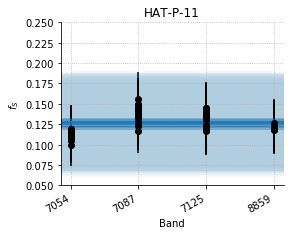

In [8]:
import json
h11_results = json.load(open('bandbyband_h11_results.json', 'r'))
figure, axis = plt.subplots(figsize=(4, 3))

h11_fs = []
for time in h11_results:
    f_S = np.mean([h11_results[time][band]['f_S'] for band in h11_results[time]])
    h11_fs.append(f_S)
    f_S_err = np.sqrt(np.sum(np.array([np.mean([h11_results[time][band]['f_S_lower'], 
                                                h11_results[time][band]['f_S_upper']]) 
                                       for band in h11_results[time]])**2)/4)
    f_S_err = max([f_S_err, 0.06])
#     table_results.append({'Target': star, '$f_S$': "${0:.2f} \pm {1:.2f}$".format(f_S, f_S_err)})
    axis.axhline(f_S, alpha=0.5)
    axis.axhspan(f_S-f_S_err, f_S+f_S_err, alpha=0.02)
    for i, band in enumerate(h11_results[time]):
        m = h11_results[time][band]

        axis.errorbar(i, m['f_S'], yerr=np.array([[m['f_S_lower'], m['f_S_upper']]]), 
                      fmt='o', color='k')
        axis.set_title('HAT-P-11')

        for s in ['right', 'top']:
            axis.spines[s].set_visible(False)
        axis.grid(ls=':')
    axis.set_xticks(np.arange(4))
    axis.set_xticklabels(sorted(h11_results[time].keys()))
    plt.setp(axis.get_xticklabels(), rotation=30, ha='right')
axis.set_ylim([0.05, 0.25])
axis.set(xlabel='Band', ylabel='$f_S$')
figure.savefig('/Users/bmmorris/Dropbox/Apps/ShareLaTeX/freckles/h11.pdf', bbox_inches='tight')

In [9]:
np.median(h11_fs), np.std(h11_fs)

(0.12633786791387822, 0.0030775058414209801)

In [10]:
from json import dump
from astropy.table import Table

f_S_table = Table(rows=table_results)

f_S_table.write('f_S.tex', overwrite=True)

In [11]:
machine_results = Table([f_S_stars, f_S_all, f_S_err_all], names=['Target', 'f_S', 'f_S_err'])
sinds_table = Table.read('/Users/bmmorris/git/arces_hk/freckles.tex')

In [40]:
sind_names = [s for s in sinds_table['Target']]
sinds = [float(s.split('\pm')[0][1:-1]) for s in sinds_table['$S$']]
sind_errs = [float(s.split('\pm')[1][1:-1]) for s in sinds_table['$S$']]


rprimes = [float(s.split('\pm')[0][1:-1]) for s in sinds_table['$\log R^\prime_\mathrm{HK}$']]
rprimes_errs = [float(s.split('\pm')[1][1:-1]) for s in sinds_table['$\log R^\prime_\mathrm{HK}$']]
# rprimes = [float(s) for s in sinds_table['$\log R^\prime_\mathrm{HK}$']]

types = classifications['Type']

In [41]:
sind_machine_table = Table([sind_names, sinds, sind_errs, rprimes, rprimes_errs], names=['Target', 'S', 'S_err', 'R', 'R_err'])

In [48]:
from astropy.table import join, Column, vstack
from astropy.io import ascii

gaia = ascii.read('temperatures/gaia2.tsv', data_start=3, delimiter='\t')

gb = gaia.group_by('_1')

gaia_dedup = Table(gb.groups[0])

for i in np.arange(1, len(gb.groups)): 
    group = gb.groups[i]
    gaia_dedup.add_row(group[np.argmin(group['Gmag'])])

gaia_dedup.add_column(Column([s.replace(' ','') for s in gaia_dedup['_1']], 'Target'))
    
joined_table = join(join(join(sind_machine_table, machine_results), gaia_dedup, keys='Target'), classifications, keys='Target')

In [89]:
rotation_table = Table.read('rotation_periods.txt', names=['Target', '$P_\mathrm{rot}$', 'Ref.'], delimiter=' ', format='ascii')

In [90]:
rotation_plus = join(joined_table, rotation_table, join_type='inner')

In [91]:
rotation_outer = join(joined_table, rotation_table, join_type='outer')

In [92]:
from astropy.table import hstack


rotation_outer[['Target', 'f_S', '$P_\mathrm{rot}$']].pprint(max_lines=100)


    Target          f_S        $P_\mathrm{rot}$
------------- ---------------- ----------------
        51Peg  0.0720036151948             37.0
        EKDra   0.275248560291            2.766
        EQVir   0.251432199017              3.9
       GJ702B 0.00048224065695             19.7
      GJ9781A   0.154925206036             7.66
       HATP11               --             29.2
     HD110833 0.00411723587662               --
     HD113827   0.149034922783               --
     HD122120  0.0995544929466               --
     HD127506   0.467047011544             10.0
     HD134319 0.00885907121679             4.43
      HD14039   0.118410504479               --
     HD148467   0.173493991242             5.31
     HD149957  0.0871160728359               --
     HD151288   0.282568009356               --
     HD175742   0.537854228325             2.88
     HD200560 0.00543870706279           10.526
     HD220182   0.327085944114             7.49
     HD222107   0.130794283497          

In [93]:
#colors = (joined_table['BP-RP'] -  joined_table['BP-RP'].min())/ joined_table['BP-RP'].ptp()

In [99]:
joined_table_groups = joined_table.group_by('Type')

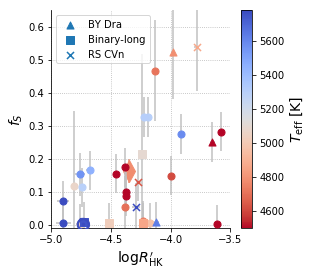

In [113]:
#xerr = 0.14

fig, ax = plt.subplots(figsize=(4, 4))

for group, fmt, label in zip(joined_table_groups.groups, ['o', '^', 's', 'x'], 
                             [set(g['Type']).pop() for g in joined_table_groups.groups]):
    
    for x, y, xerr, yerr, c in zip(group['R'], group['f_S'], 
                                   group['R_err'], [max([e, 0.06]) for e in group['f_S_err']], 
                                   group['Teff']):
        ax.errorbar(x, y, xerr=xerr, yerr=yerr, 
                     fmt=',', ecolor='silver', label=None)

        cbar = ax.scatter(x, y, marker=fmt, 
                          s=50, c=c, zorder=10, cmap=plt.cm.coolwarm_r, 
                          vmin=4500, vmax=5777, label=label)

    
#     ax.errorbar(group['R'], group['f_S'], 
#                  xerr=group['R_err'], yerr=[max([e, 0.06]) for e in group['f_S_err']], 
#                  fmt=',', ecolor='silver', label=None)

#     cbar = ax.scatter(group['R'], group['f_S'], marker=fmt, 
#                       s=50, c=group['Teff'], zorder=10, cmap=plt.cm.coolwarm_r, 
#                       vmin=4500, vmax=5777, label=label)

cax = plt.colorbar(cbar, ax=ax)
cax.set_label('$T_\mathrm{eff}$ [K]', fontsize=14)

hat11_color = cax.to_rgba(4780) #1.2787)
sun_color = cax.to_rgba(5777) #0.817)
ax.scatter(-4.74, 0.003, marker='$\odot$', s=200, color=sun_color, zorder=10)
# ax.scatter(-4.35, 0.05, marker='s', s=200, color=hat11_color, zorder=-10)

ax.errorbar(-4.35, 0.16186191295635663, 0.036, fmt='d', ms=15, color=hat11_color, zorder=-10)

# ax.legend(loc='upper left')

from collections import OrderedDict
import matplotlib.pyplot as plt

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left')

ax.set(xlim=[-5.,-3.5], ylim=[-0.01, 0.65])
ax.set_xlabel('$\log R^\prime_\mathrm{HK}$', fontsize=14)
ax.set_ylabel('$f_S$', fontsize=14)
for s in ['right', 'top']:
    ax.spines[s].set_visible(False)

ax.grid(ls=':')
fig.savefig('paper_plots/fs_rprime.pdf', bbox_inches='tight')
fig.savefig('/Users/bmmorris/Dropbox/Apps/ShareLaTeX/freckles/fs_rprime.pdf', bbox_inches='tight')

In [103]:
rotation_plus_groups = rotation_plus.group_by('Type')

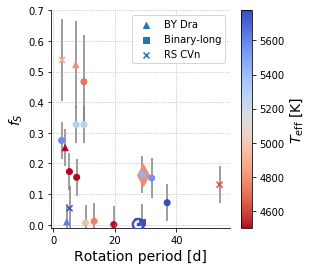

In [110]:
fig, ax = plt.subplots(figsize=(4, 4))

for group, fmt, label in zip(rotation_plus_groups.groups, ['o', '^', 's', 'x'], 
                             [set(g['Type']).pop() for g in rotation_plus_groups.groups]):

    ax.errorbar(group['$P_\mathrm{rot}$'], group['f_S'], 
                yerr=[max([e, 0.06]) for e in group['f_S_err']], 
                ecolor='gray', fmt=',', zorder=-100, label=None)

    cax = plt.scatter(group['$P_\mathrm{rot}$'], group['f_S'], 
                      c=group['Teff'], cmap=plt.cm.coolwarm_r, vmin=4500, vmax=5777, 
                      marker=fmt, label=label)

cbar = plt.colorbar(cax)
cbar.set_label('$T_\mathrm{eff}$ [K]', fontsize=14)

ax.scatter(27.2753, 0.003, marker='$\odot$', s=200, color=sun_color, zorder=10)
# ax.scatter(29, 0.05, marker='s', s=200, color=hat11_color, zorder=-10)

ax.errorbar(29.2, 0.16186191295635663, 0.036, fmt='d', ms=15, color=hat11_color, zorder=-10)
ax.set_xlabel('Rotation period [d]', fontsize=14)
ax.set_ylabel('$f_S$', fontsize=14)
ax.grid(ls=':')
ax.legend(loc='upper right')
for s in ['right', 'top']:
    ax.spines[s].set_visible(False)
ax.set_ylim([-0.01, 0.7])
fig.savefig('paper_plots/rotation.pdf', bbox_inches='tight')
fig.savefig('/Users/bmmorris/Dropbox/Apps/ShareLaTeX/freckles/rotation.pdf', bbox_inches='tight')

In [22]:
# Problem children: HD222107, HD178126

In [23]:
joined_table.add_index('Target')

In [24]:
rotation_plus.add_index('Target')

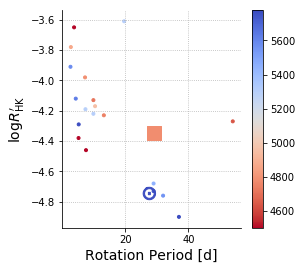

In [25]:
rprimes_rot = [joined_table.loc[t]['R'] for t in rotation_plus['Target']]
rprimes_err_rot = [joined_table.loc[t]['R_err'] for t in rotation_plus['Target']]

fig, ax = plt.subplots(figsize=(4, 4))
cax = ax.scatter(rotation_plus['$P_\mathrm{rot}$'], rprimes_rot, marker='.', 
           c=rotation_plus['Teff'], cmap=plt.cm.coolwarm_r, vmin=4500, vmax=5777)


ax.scatter(27.2753, -4.74, c=sun_color, marker='$\odot$', s=200)
ax.scatter(29, -4.35, marker='s', s=200, color=hat11_color, zorder=-10)

ax.set_xlabel('Rotation Period [d]', fontsize=14)
ax.set_ylabel('$\log R^\prime_\mathrm{HK}$', fontsize=14)
cbar.set_label('$T_\mathrm{eff}$ [K]', fontsize=14)

plt.colorbar(cax)
for s in ['right', 'top']:
    ax.spines[s].set_visible(False)
ax.grid(ls=':')
fig.savefig('paper_plots/rot_rprime.pdf', bbox_inches='tight')
fig.savefig('/Users/bmmorris/Dropbox/Apps/ShareLaTeX/freckles/rot_rprime.pdf', bbox_inches='tight')

# Good job 👏 Now run `megatable.ipynb`